# **MÓDULO 17 - Projeto de Credit Score - Parte 1 - Processamento dos dados**


Essa é a primeira etapa do processo de Credit Score que vocês desenvolverão durante nosso curso.
Nessa primeira etapa vocês irão aplicar os passos aprendidos nos módulos de pré processamento para preparar a base de vocês para o desenvolvimento do modelo.

O termo "credit score" se refere a uma pontuação numérica que representa a credibilidade de um indivíduo em termos de cumprimento de obrigações financeiras, como pagar contas de empréstimos, cartões de crédito, entre outros. Essa pontuação é calculada com base em diversas informações financeiras e de crédito do indivíduo, como histórico de pagamentos, níveis de endividamento, tempo de crédito, tipos de crédito utilizados, entre outros.

O objetivo de um modelo de credit score é prever o risco de um indivíduo se tornar inadimplente com suas obrigações financeiras. Em outras palavras, o modelo avalia a probabilidade de um indivíduo não cumprir com os pagamentos de empréstimos ou outros compromissos financeiros. Essa previsão é fundamental para instituições financeiras, como bancos e credores, na tomada de decisão sobre a concessão de crédito. Um modelo de credit score eficaz pode ajudar essas instituições a avaliar o risco de emprestar dinheiro a um determinado indivíduo e, assim, tomar decisões mais informadas sobre a aprovação ou negação de crédito, bem como sobre os termos e condições desses empréstimos.

**Atenção:** Notem que esse projeto é diferente da base que tenho trabalhado com vocês em aula, apesar de se tratar de uma base bancária durante a aula falamos sobre a variável Churn a ser prevista, nesse caso a previsão seria do valor do Score de Crédito.

In [121]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
from sklearn.preprocessing import LabelEncoder

In [122]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("D:\Documentos(D)\ProjetosPython\Projeto Credit_Score\CREDIT_SCORE_PROJETO_PARTE1.csv", delimiter=';')

df.head(10)

<>:2: SyntaxWarning:

invalid escape sequence '\D'

<>:2: SyntaxWarning:

invalid escape sequence '\D'

C:\Users\iuryd\AppData\Local\Temp\ipykernel_2660\3516734780.py:2: SyntaxWarning:

invalid escape sequence '\D'



,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,"50.000,00",Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,"100.000,00",Master's Degree,Married,2,Owned,High
2,35.0,Female,"75.000,00",Doctorate,Married,1,Owned,High
3,40.0,Male,"125.000,00",High School Diploma,Single,0,Owned,High
4,45.0,Female,"100.000,00",Bachelor's Degree,Married,3,Owned,High
5,50.0,Male,"150.000,00",Master's Degree,Married,0,Owned,High
6,26.0,Female,"40.000,00",Associate's Degree,Single,0,Rented,Average
7,31.0,Male,"60.000,00",Bachelor's Degree,Single,0,Rented,Average
8,NaN,Female,"80.000,00",Master's Degree,Married,2,Owned,High
9,NaN,Male,"105.000,00",Doctorate,Single,0,Owned,High


Legenda dos dados:

*   **Age** : Idade dos nossos clientes.

*   **Income** : Salário Mensal.

*   **Gender** : Gênero.

*   **Education** : Nível de escolaridade dos clientes.

*   **Marital** : Status Civilmente.

*   **Number of Children** : Quantidade de filhos.

*   **Home** : Tipo de residência, alugada ou própria.

*   **Credit Score** : Nossa variável preditora, o score de crédito dos clientes.


# Etapa 1: Relize os passos que vimos no módulo 18, de pré processamento dos dados.

**A) Verifique os tipos de dados, fazendo as transformações quando necessário.**


In [123]:
df.value_counts()

#Ajustando coluna salario anual(Income)
df['Income'] = df['Income'].str.replace('.', '', regex=False).str.replace(',', '', regex=False)
df['Income'] = df['Income'].astype(int)
df['Income'] = df['Income'] / 100


df.dtypes


Age                   float64
Gender                 object
Income                float64
Education              object
Marital Status         object
Number of Children      int64
Home Ownership         object
Credit Score           object
dtype: object

**B) Verifique se temos colunas com dados faltantes.
Caso existam colunas com dados faltantes faça o tratamento desses dados, excluindo ou substituindo esses valores. Justifique sua escolha.**

In [124]:
df.isna().sum()
df.dropna()
#utilizando df.isna().sum(), percebemos que a quantidade de dados nulos é baixa, portanto, retirar eles não teria um impacto muito grande para a aanálise


,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25.0,Female,50000.0,Bachelor's Degree,Single,0,Rented,High
1,30.0,Male,100000.0,Master's Degree,Married,2,Owned,High
2,35.0,Female,75000.0,Doctorate,Married,1,Owned,High
3,40.0,Male,125000.0,High School Diploma,Single,0,Owned,High
4,45.0,Female,100000.0,Bachelor's Degree,Married,3,Owned,High
...,...,...,...,...,...,...,...,...
159,29.0,Female,27500.0,High School Diploma,Single,0,Rented,Low
160,34.0,Male,47500.0,Associate's Degree,Single,0,Rented,Average
161,39.0,Female,62500.0,Bachelor's Degree,Married,2,Owned,High
162,44.0,Male,87500.0,Master's Degree,Single,0,Owned,High


**C) Verifique se temos valores digitados de forma incorreta nas variáveis categóricas que necessitem de tratamento.**

In [125]:
df.value_counts()
#esta etapa foi feita mais acima, pois antes de transformar os dados prefiro verificar se tem valores diferentes do esperado

Age   Gender  Income    Education            Marital Status  Number of Children  Home Ownership  Credit Score
33.0  Male    52500.0   High School Diploma  Single          0                   Rented          Average         4
28.0  Female  32500.0   Associate's Degree   Single          0                   Rented          Low             4
30.0  Male    117500.0  Master's Degree      Married         2                   Owned           High            3
27.0  Female  37500.0   High School Diploma  Single          0                   Rented          Low             3
38.0  Female  67500.0   Bachelor's Degree    Married         2                   Owned           High            3
                                                                                                                ..
41.0  Male    115000.0  Doctorate            Single          0                   Owned           High            1
              120000.0  Doctorate            Single          0                   Owne

# Etapa 2: Relize os passos que vimos no módulo 15, de análise.

**A) Realiza a análise univariada, aplique a função describe ao nosso dataframe para verificar os dados das variáveis numéricas, se encontrar a possível presença de outliers analise com gráficos a distribuição dos dados.Traga insights sobre os dados analisados.**

In [126]:
df.describe()

,Age,Income,Number of Children
count,130.000000,164.000000,164.000000
mean,37.507692,83765.243902,0.652439
std,8.500110,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.000000,57500.000000,0.000000
50%,36.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


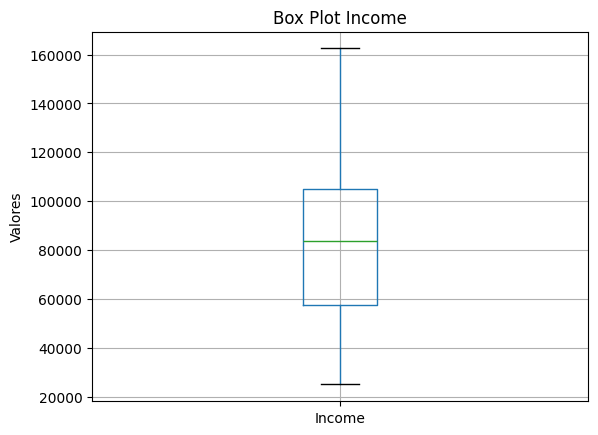

In [127]:
#plotando um gráfico de Income
df.boxplot(column='Income')
plt.title('Box Plot Income')
plt.ylabel('Valores')
plt.show()



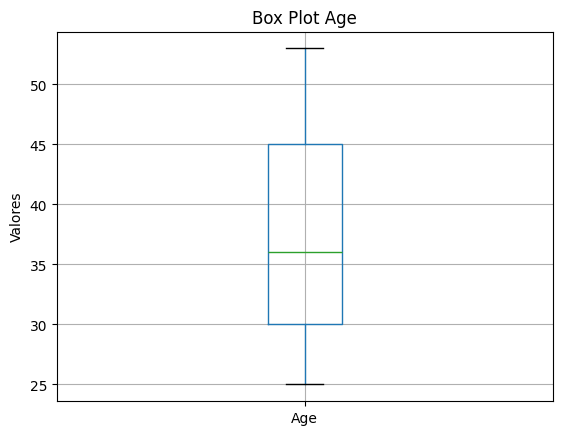

In [128]:
#plotando um gráfico de Age
df.boxplot(column='Age')
plt.title('Box Plot Age')
plt.ylabel('Valores')
plt.show()

Percebemos com os gráficos que nossa base de dados está aparentemente bem distribuida, pois não foi encontrado nenhum dado extremamente alto ou baixo. Os gráficos apresentam uma média salarial bem centralizada com alguns valores pontuais mais altos, bem como a idade.

**B) Agora realize a análise univariada para as variaveis categóricas, plote gráficos para entender a distribuição das categorias e tente retirar insights de cada gráfico.**

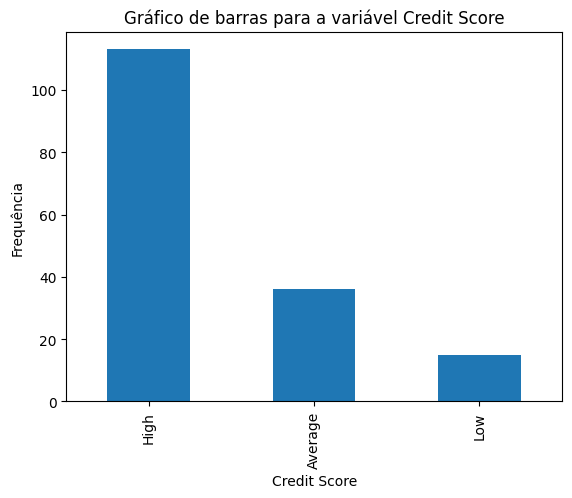

In [129]:
contagem_creditscore = df['Credit Score'].value_counts()

porcentagem_creditscore = (contagem_creditscore/ contagem_creditscore.sum())
ax = contagem_creditscore.plot(kind='bar')
plt.title('Gráfico de barras para a variável Credit Score')
plt.xlabel('Credit Score')
plt.ylabel('Frequência')
plt.show()

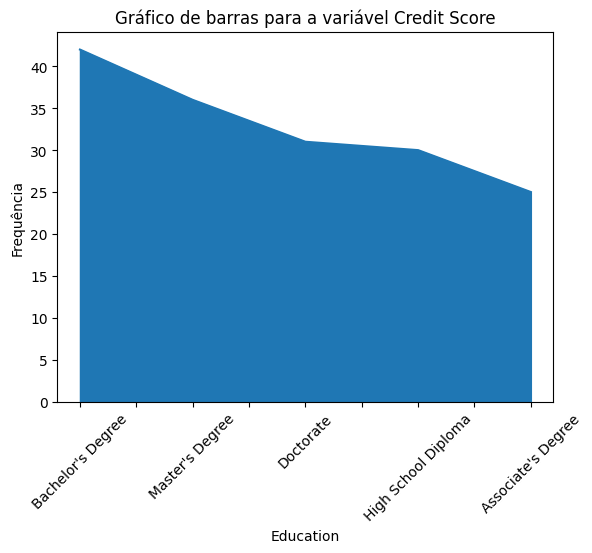

In [130]:
#analisando o nível de educação
contagem_Education = df['Education'].value_counts()

porcentagem_Education = (contagem_Education/ contagem_Education.sum())
ax = contagem_Education.plot(kind='area')
plt.title('Gráfico de barras para a variável Credit Score')
plt.xlabel('Education')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

Com os gráficos plotados percebemos que a maioria dos cliente possui um credit score alto e a maioria dos clientes possuem bacharelado.

**C) Você encontrou alguma coluna com outliers?
Se sim realize o tratamento desses casos.**

Não consegui encontrar nenhum outlier, aparentemente todos os dados estão conforme o esperado

**D) Realize a análise Bivariada.
Tente responder as seguintes perguntas com gráficos seguidos de insights:**



*   Existe relação entre a idade e o status civil?
*   Qual a relação entre o score de crédito e o nível de escolaridade?
*  O salário parece influenciar na idade?
* O salário parece influenciar no Score de Crédito?
* Clientes com casa própria tendem a ter um score mais alto?



In [131]:
fig = px.histogram(df, x='Age', color='Marital Status', barmode='stack', nbins=2)

fig.update_layout(title='Relação entre Idade e Estado Civil',
                  xaxis_title='Idade',
                  yaxis_title='Contagem',
                  legend_title='Estado Civil')
fig.show()

In [132]:
fig = px.histogram(df, x='Education', color='Credit Score', barmode='stack')

fig.update_layout(title='Relação entre Credit Score e Educação',
                  xaxis_title='Education',
                  yaxis_title='Contagem',
                  legend_title='Credit Score')
fig.show()

In [133]:
media_salario_por_idade = df.groupby('Age')['Income'].median().reset_index()

fig = px.bar(media_salario_por_idade, x = 'Age', y = 'Income',
             title = 'Média de Salários por Idade',
             labels={'Income' : 'Income', 'Age' : 'Age'})
fig.show()

In [134]:
media_salario_por_creditscore = df.groupby('Credit Score')['Income'].median().reset_index()

fig = px.bar(media_salario_por_creditscore, x = 'Credit Score', y = 'Income',
             title = 'Média de Salários por Credit Score',
             labels={'Income' : 'Income', 'Credit Score' : 'Credit Score'})
fig.show()

In [135]:
fig = px.histogram(df, x='Home Ownership', color='Credit Score', barmode='stack')

fig.update_layout(title='Relação entre Pessoas com casa e credit score',
                  xaxis_title='Home Ownership',
                  yaxis_title='Contagem',
                  legend_title='Credit Score')
fig.show()

Com os gráficos plotados temos:


A)Pessoas mais velhas tendem a estarem mais casadas


B)Com algumas exceções, mas no geral pessoas com mais escolaridade possuem credit score maior


C)A idade influencia diretamente no salário, inclusive com algumas sazonalidades ao longo do gráfico


D)Salário influencia diretamente no credit score, visto quee pessoas com salário maior possuem credit score maior também


E)Sim, nota-se que em quase todos os casos, os clientes que possuem casa própria possuem score alto


**E) Que outras perguntas te parecem fazer sentido explorarmos a resposta para conhecermos mais nossa base de dados e o comportamento dos clientes?**

 Elabore mais 3 perguntas e responda utilizando gráficos + insights.

In [136]:
media_salario_por_education = df.groupby('Education')['Income'].median().reset_index()

fig = px.bar(media_salario_por_education, x = 'Education', y = 'Income',
             title = 'Média de Salários por Idade',
             labels={'Income' : 'Income', 'Education' : 'Education'})
fig.show()

In [137]:
media_education_por_noc = df.groupby('Education')['Number of Children'].median().reset_index()

fig = px.bar(media_education_por_noc, x = 'Education', y = 'Number of Children',
             title = 'Média de Education por number of children',
             labels={'Number of Children' : 'Number of Children', 'Education' : 'Education'})
fig.show()

In [138]:
fig = px.histogram(df, x='Age', color='Credit Score', barmode='stack', nbins=3)

fig.update_layout(title='Relação entre Idade e Credit Score',
                  xaxis_title='Idade',
                  yaxis_title='Contagem',
                  legend_title='Credit Score')
fig.show()

Com os gráficos plotados identificamos principalmente que a média salarial aumenta conforme o grau de especializaação/educação e que a media de credit score alto aumenta conforme a idade

# Etapa 3: Relize os passos que vimos no módulo 17, de Correlação, Balanceamento, atributos categóricos e divisão base treino e teste.

**A) Vamos começar pela análise de correlação, plote da forma que achar melhor a análise de correlação, seja pela tabela ou pelo gráfico da matriz.**

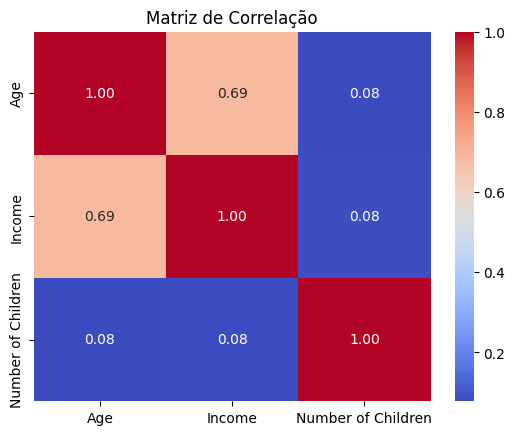

In [139]:
correlation_matriz = df.select_dtypes(include=['number']).corr()

sns.heatmap(correlation_matriz, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlação')
plt.show()

**B) Você encontrou variáveis que tem uma média ou alta correlação? Se sim, quais? Te parece fazer sentido essas variáveis terem alta correlação? Justifique.**

Com essa análise, conseguimos relacionar fortemente a renda anual com a idade, o que parece fazer sentido, visto que os gráficos anteriores também levam a mesma conclusão.

**C) Temos muitos atributos categóricos nessa base, não? Vamos realizar a o tratamento desses atributos utilizando Label Encoder ou one hot. Após, exclua as colunas categóricas.**

In [140]:
label_encoder = LabelEncoder()
#Ajustando coluna gênero
df['Gender_enconded'] = label_encoder.fit_transform(df['Gender'])
df = df.drop('Gender', axis=1)

#Ajustando coluna educação
df = pd.get_dummies(df, columns=['Education'], prefix='Education', drop_first=True)

#Ajustando status civil
df['MaritalStatus_Encoded'] = label_encoder.fit_transform(df['Marital Status'])
df = df.drop('Marital Status', axis=1)

#Ajustando o tipo de residência
df['HomeOwnership_Encoded'] = label_encoder.fit_transform(df['Home Ownership'])
df = df.drop('Home Ownership', axis=1)

#Ajustando Credit_Score
df['CreditScore_Encoded'] = label_encoder.fit_transform(df['Credit Score'])
df = df.drop('Credit Score', axis=1)

In [141]:
print(df['CreditScore_Encoded'])

0      1
1      1
2      1
3      1
4      1
      ..
159    2
160    0
161    1
162    1
163    1
Name: CreditScore_Encoded, Length: 164, dtype: int32


**D) Vamos plotar novamente a correlação, agora observando com as variáveis categóricas. Identifique se temos novas variáveis com forte correlação.**

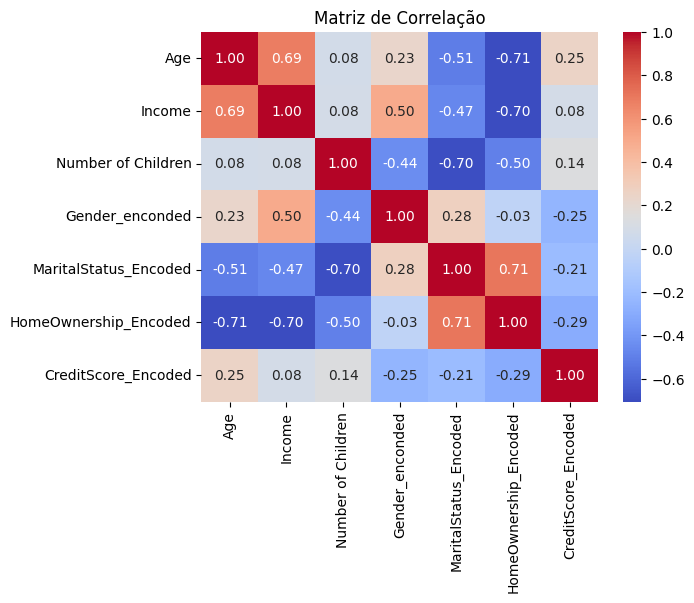

In [142]:
correlation_matriz = df.select_dtypes(include=['number']).corr()

sns.heatmap(correlation_matriz, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size":10})
plt.title('Matriz de Correlação')
plt.show()

Percebemos que idade se relaciona bastante com home ownership e income. Income se relaciona bem com homeownership, gender e estado civil. Number of children possui forte relação com gender, marital status e home ownership

**F) Faça a separação da base em treino e teste e verifique utilizando shape:**

In [143]:
X = df.drop('CreditScore_Encoded', axis=1)
y = df['CreditScore_Encoded']

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**G) É hora de verificar se nossa coluna de Score de crédito está balanceada, verifique através de um gráfico e traga sua opinião acerca do balanceamento.**

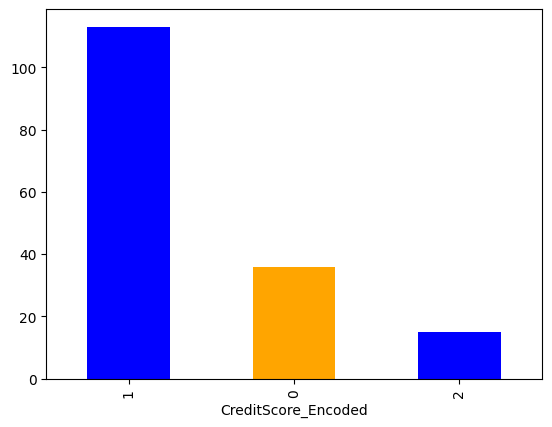

In [146]:
creditscore_counts = df['CreditScore_Encoded'].value_counts()
creditscore_counts.plot(kind='bar', color=['blue','orange'])
plt.show()

Os dados estão normais, porém necessário balancear o 2(credit score baixo)

**H) Vamos realizar o balancecamento dos dados da coluna de credit score.**
Se lembre que realizazmos apenas para a base de treino.

In [147]:
X_train = X_train.fillna(X_train.mean())

In [148]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("Distribuição das classes após o balanceamento")
print(y_train_balanced.value_counts())

Distribuição das classes após o balanceamento
CreditScore_Encoded
0    84
2    84
1    84
Name: count, dtype: int64
